<a href="https://colab.research.google.com/github/nguyenthithuylinh-ship-it/Diabetes_Project/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

# Import Plotly
import plotly.graph_objs as go
import plotly.offline as py

In [41]:
url = "https://raw.githubusercontent.com/nguyenthithuylinh-ship-it/Diabetes_Project/refs/heads/main/data/diabetes.csv"
data = pd.read_csv(url)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [43]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 1️⃣ Tách dữ liệu theo Outcome

In [44]:
# D: bệnh nhân bị tiểu đường (Outcome != 0)
D = data[(data['Outcome'] != 0)]

# H: bệnh nhân khỏe mạnh (Outcome == 0)
H = data[(data['Outcome'] == 0)]


# 2️⃣ Hàm vẽ biểu đồ thanh (Count)

In [45]:

def target_count():
    # Tạo trace (thanh ngang) cho biểu đồ
    trace = go.Bar(
        x = data['Outcome'].value_counts().values.tolist(),  # số lượng cho mỗi Outcome
        y = ['Khỏe mạnh','Bị bệnh'],                          # nhãn tương ứng cho từng thanh
        orientation = 'h',                                   # thanh ngang
        text = data['Outcome'].value_counts().values.tolist(), # hiển thị số lượng trên thanh
        textfont = dict(size=15),                             # cỡ chữ số lượng
        textposition = 'auto',                                # vị trí hiển thị số lượng
        opacity = 0.8,                                        # độ mờ của thanh
        marker = dict(
            color = ['#789DBC', '#FFE3E3'],                # màu thanh
            line = dict(color='#000000', width=1.5)         # viền thanh màu đen
        )
    )

    # Tạo layout cho biểu đồ
    layout = dict(title='Số lượng của biến Outcome')       # tiêu đề biểu đồ

    # Kết hợp data và layout, tạo figure
    fig = dict(data=[trace], layout=layout)

    # Hiển thị biểu đồ trong Jupyter/Colab
    py.iplot(fig)


## Gọi hàm để hiển thị biểu đồ

In [46]:
target_count()    # Biểu đồ số lượng

# 3️⃣ Hàm vẽ biểu đồ tròn (Percentage)

In [47]:
def target_percent():
    # Tạo trace cho biểu đồ tròn
    trace = go.Pie(
        labels = ['Khỏe mạnh','Bị bệnh'],                     # nhãn cho từng phần
        values = data['Outcome'].value_counts(),            # giá trị số lượng / tỷ lệ
        textfont = dict(size=15),                            # cỡ chữ nhãn
        opacity = 0.8,                                       # độ mờ
        marker = dict(
            colors = ['#789DBC', '#FFE3E3'],               # màu cho từng phần
            line = dict(color='#000000', width=1.5)         # viền màu đen
        )
    )

    # Layout cho biểu đồ
    layout = dict(title='Tỷ lệ của biến Outcome') # tiêu đề

    # Tạo figure
    fig = dict(data=[trace], layout=layout)

    # Hiển thị biểu đồ
    py.iplot(fig)

## Gọi hàm để hiển thị biểu đồ tròn

In [48]:
target_percent()  # Biểu đồ tỷ lệ phần trăm

# 4️⃣ Thay thế giá trị 0 bằng NaN

**Lý do: giá trị 0 không hợp lý trong dữ liệu y tế. Thay bằng np.NaN để biểu thị dữ liệu bị thiếu và xử lý sau này**

In [49]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

**Định nghĩa hàm missing_plot**<br>
Hàm này vẽ biểu đồ thanh để kiểm tra các giá trị thiếu (missing values) trong dataset. Nhớ đó sẽ biết cột nào có giá trị bị thiếu và tỷ lệ phần trăm giá trị thiếu đó.

In [50]:
def missing_plot(dataset, key):
    """
    - dataset: DataFrame chứa dữ liệu
    - key: tên cột hoặc danh sách cột muốn kiểm tra
    """

    #Tính số lượng giá trị không thiếu cho mỗi feature
    null_feat = pd.DataFrame(len(dataset[key]) - dataset[key].isnull().sum(), columns=['Count'])

    #Tính tỷ lệ % giá trị thiếu cho mỗi feature
    percentage_null = pd.DataFrame(
        dataset[key].isnull().sum() / len(dataset[key]) * 100,
        columns=['Count']
    )
    percentage_null = percentage_null.round(2)  # làm tròn 2 chữ số
     #Tạo trace cho biểu đồ thanh
    trace = go.Bar(
        x = null_feat.index,                        # tên các cột
        y = null_feat['Count'],                      # số lượng giá trị không thiếu
        opacity = 0.8,                               # độ mờ thanh
        text = percentage_null['Count'],             # hiển thị % giá trị thiếu trên thanh
        textposition = 'auto',                       # vị trí text
        marker = dict(
            color = '#789DBC',                       # màu thanh
            line = dict(color='#000000', width=1.5)  # viền thanh màu đen
        )
    )
    #Tạo layout cho biểu đồ
    layout = dict(title="Giá trị thiếu")

    #Tạo figure và hiển thị
    fig = dict(data=[trace], layout=layout)
    py.iplot(fig)

**Gọi hàm để hiển thị missing plot**

In [51]:
# Dataset là data và muốn kiểm tra tất cả cột
missing_plot(data, data.columns)

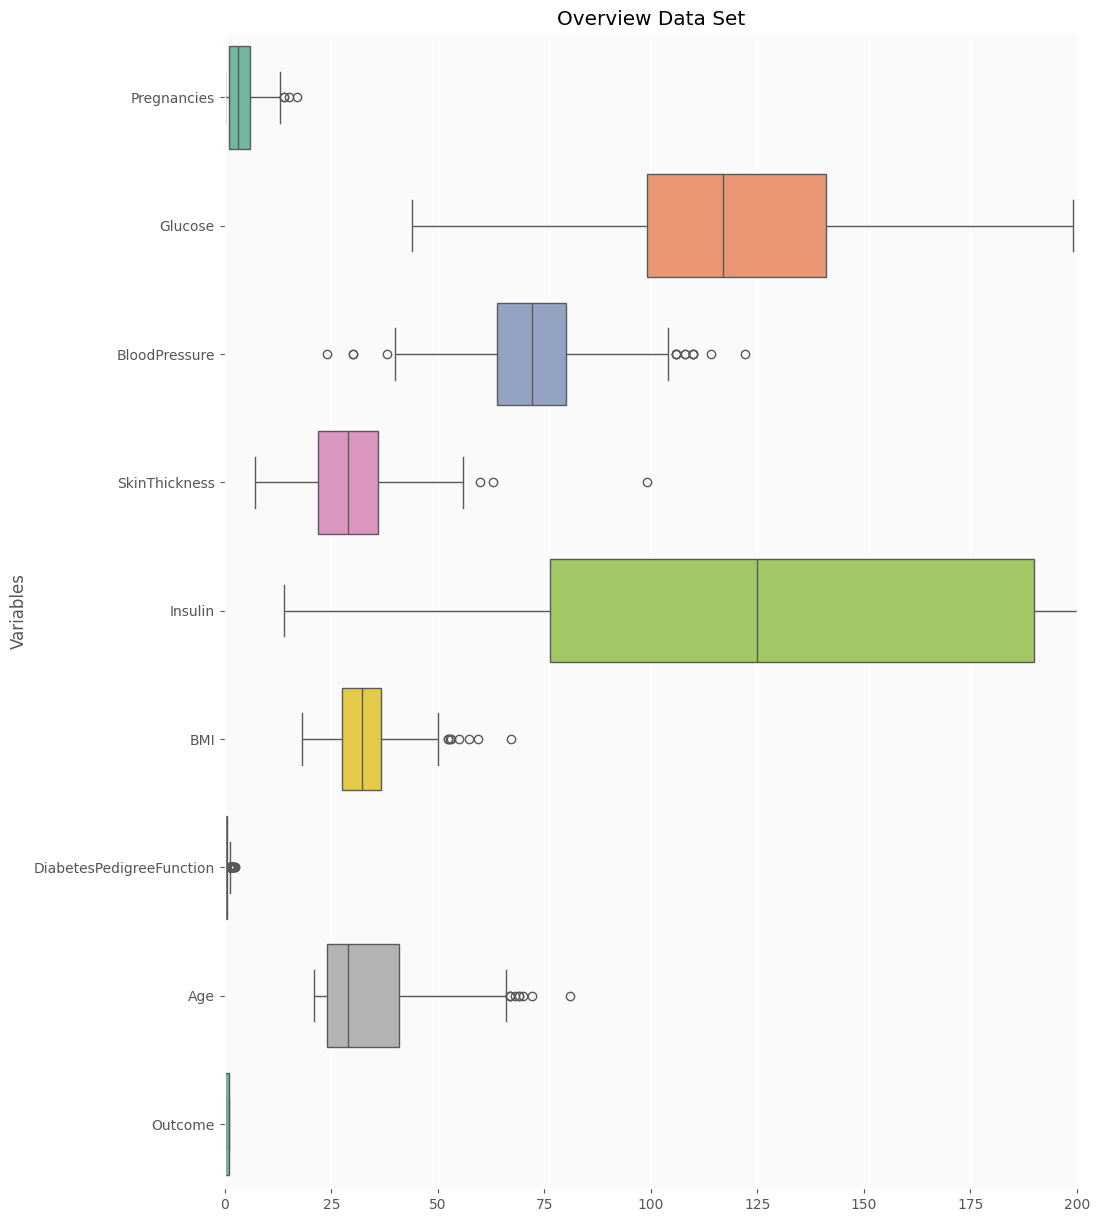

In [52]:
# -------------------------------
# Tổng quan dữ liệu bằng Boxplot ngang
# -------------------------------
# Chọn style ggplot cho biểu đồ trực quan
plt.style.use('ggplot')

# Tạo figure và axes lớn để hiển thị nhiều biến
f, ax = plt.subplots(figsize=(11, 15))

# Tùy chỉnh axes
ax.set_facecolor('#fafafa')      # Màu nền của biểu đồ
ax.set(xlim=(-0.05, 200))        # Giới hạn trục x (tùy dữ liệu)
plt.ylabel('Variables')          # Nhãn trục y
plt.title("Overview Data Set")   # Tiêu đề biểu đồ

# Vẽ boxplot ngang tất cả các cột trong dataset
# - orient='h': boxplot nằm ngang
# - palette='Set2': bảng màu đẹp mắt, nhiều màu pastel
ax = sns.boxplot(data=data, orient='h', palette='Set2')
